In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import display, Markdown
# mpl.rc('text', usetex=True)
mpl.rc('font', family='sans-serif')
mpl.rc('font',size = 8)
mpl.rc('mathtext',fontset = 'stix')

mpl.rc('xtick', labelsize=4)
mpl.rc('ytick', labelsize=4)
mpl.rc('axes', labelsize=8)
mpl.rc('axes', labelpad=1)
mpl.rc('axes', titlesize=6)
mpl.rc('axes', linewidth=0.5)
mpl.rc('figure', figsize=(3.55/2.54, 2.8/2.54))
mpl.rc('figure', dpi=400)
mpl.rc('legend',frameon = False)
mpl.rc('savefig',pad_inches = 0.01)


cm_number = 14
cm = plt.cm.get_cmap("Purples")
# colors = ["#F9D5DD","#E3738B","#713948","#DCE4FA","#8CA5EA","#495373"]
colors = ["#b3c8cd", "#87b26c","#811c35","#DE8F5F","#585d5e"]
Colors = [cm(1. / (cm_number - 1) * i) for i in range(0, cm_number)]
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


C:\Users\tengm\AppData\Local\Temp\ipykernel_19044\3256712815.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap("Purples")


1. Data input

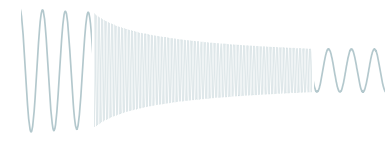

In [2]:
Fs = 20
T = 2000
t = np.linspace(0,T,T*Fs)
omega0 = np.sqrt(1)

# weakly dynamic, \epsilon = 1e-3
def WND(x,t):
    dxdt = [x[1], -omega0**2*x[0]-1e-2*(x[1]**3+2*x[0]**3)]
    return dxdt
x0 = [1,0]
WND_response = odeint(WND, y0 = x0,t = t)
noise = 0.01
N = len(WND_response[:,0])
Observation = WND_response[:,0] + np.random.random(N) * noise

fig,ax = plt.subplots(figsize = (4/2.54,1.5/2.54),dpi = 300)
# ax.spines["left"].set_color("white")
# ax.spines["right"].set_color("white")
# ax.spines["top"].set_color("white")
# ax.spines["bottom"].set_color("white")
ax.set_xticks([])
ax.set_yticks([])

ax.set_axis_off()
axins = inset_axes(ax, width="20%", height="100%", loc='center left',
                   bbox_to_anchor=(0, 0, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(t, Observation,lw = 0.4,color = colors[0],label = "$x'' = -x$")
axins.set_xlim(0,20)
# axins.set_ylabel(r"$x$")
axins.set_xticks([])
axins.set_yticks([])
axins.set_ylim(-1.1,1.1)
axins.spines["right"].set_color("white")
axins.spines["top"].set_color("white")
axins.spines["bottom"].set_color("white")
axins.spines["left"].set_color("white")

axins = inset_axes(ax, width="20%", height="100%", loc='center left',
                   bbox_to_anchor=(0.8, 0, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(t, Observation,lw = 0.4,color = colors[0],label = "$x'' = -x$")
axins.set_xlim(980,1000)
axins.set_ylim(-1.1,1.1)
axins.set_xticks([])
axins.set_yticks([])
axins.spines["right"].set_color("white")
axins.spines["top"].set_color("white")
axins.spines["bottom"].set_color("white")
axins.spines["left"].set_color("white")
axins = inset_axes(ax, width="60%", height="100%", loc='center left',
                   bbox_to_anchor=(0.2, 0, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(t, Observation,lw = 0.05,color = colors[0],label = "$x'' = -x$")
axins.set_xlim(20,980)
axins.set_ylim(-1.1,1.1)
axins.set_yticks([])
# axins.set_xticks([500,1000,1500])
axins.set_xticks([])
axins.spines["right"].set_color("white")
axins.spines["top"].set_color("white")
axins.spines["bottom"].set_color("white")
axins.spines["left"].set_color("white")
# axins.set_xlabel("Time")
plt.savefig("./Fig/Datainput.svg",dpi = 300,transparent = True,bbox_inches="tight",pad_inches = 0.00)

2. Original Library

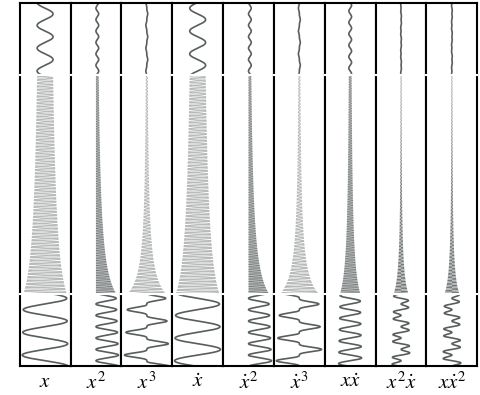

In [3]:
library = [
    lambda x:x[0],
    lambda x:x[0]*x[0],
    lambda x:x[0]*x[0]*x[0],
    lambda x:x[1],
    lambda x:x[1]*x[1],
    lambda x:x[1]*x[1]*x[1],
    lambda x:x[0]*x[1],
    lambda x:x[0]*x[0]*x[1],
    lambda x:x[0]*x[1]*x[1],
]

library_name = [
    lambda x:x[0],
    lambda x:x[0]+'^2',
    lambda x:x[0]+'^3',
    lambda x:x[1],
    lambda x:x[1]+'^2',
    lambda x:x[1]+'^3',
    lambda x:x[0]+x[1],
    lambda x:x[0]+'^2'+x[1],
    lambda x:x[0]+x[1]+'^2',
]
feature_name = ["x", "\dot{x}"]

bwith = 0.5
feature_length = len(library)
origin_library = np.zeros([feature_length, N])
for i in range(len(library)):
    origin_library[i,:] = library[i](WND_response.T)

fig,axes = plt.subplots(1,9,figsize = (5/2.54,4/2.54),dpi = 300)
plt.subplots_adjust(wspace = 0)
for i in range(9):
    name = library_name[i](feature_name)
    ax = axes[i]
    ax.set_xlabel(r'$x$')
    ax.spines["left"].set_color("white")
    ax.spines["right"].set_color("white")
    ax.spines["top"].set_color("white")
    ax.spines["bottom"].set_color("white")
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.set_axis_off()
    axins = inset_axes(ax, width="100%", height="20%", loc='lower left',
                       bbox_to_anchor=(0, 0, 1, 1),
                       bbox_transform=ax.transAxes)
    axins.plot(origin_library[i,:],t,lw = 0.4,color = colors[4],label = "$x'' = -x$")
    axins.set_ylim(0,20)
    axins.set_xlabel(r"$%s$"%name, fontsize = 5)
    axins.set_xticks([])
    axins.set_yticks([])
    axins.set_xlim(-1.1,1.1)
    # axins.spines["right"].set_color("white")
    # axins.spines["top"].set_color("white")
    # axins.spines["bottom"].set_color("white")
    # axins.spines["left"].set_color("white")
    axins.spines["right"].set_linewidth(bwith)
    axins.spines["top"].set_color("white")
    # axins.spines["bottom"].set_color("white")
    # axins.spines["left"].set_color("white")
    
    axins = inset_axes(ax, width="100%", height="20%", loc='lower left',
                       bbox_to_anchor=(0, 0.8, 1, 1),
                       bbox_transform=ax.transAxes)
    axins.plot(origin_library[i,:],t,lw = 0.4,color = colors[4],label = "$x'' = -x$")
    axins.set_ylim(980,1000)
    axins.set_xlim(-1.1,1.1)
    axins.set_xticks([])
    axins.set_yticks([])
    # axins.spines["right"].set_color("white")
    # axins.spines["top"].set_color("white")
    axins.spines["bottom"].set_color("white")
    # axins.spines["left"].set_color("white")
    axins = inset_axes(ax, width="100%", height="60%", loc='lower left',
                       bbox_to_anchor=(0, 0.2, 1, 1),
                       bbox_transform=ax.transAxes)
    axins.plot(origin_library[i,:],t,lw = 0.05,color = colors[4],label = "$x'' = -x$")
    axins.set_ylim(20,980)
    axins.set_xlim(-1.1,1.1)
    axins.set_yticks([])
    # axins.set_xticks([500,1000,1500])
    axins.set_xticks([])
    # axins.spines["right"].set_color("white")
    axins.spines["top"].set_color("white")
    axins.spines["bottom"].set_color("white")
    # axins.spines["left"].set_color("white")
plt.savefig("./Fig/origin_library.svg",dpi = 400,transparent = True,bbox_inches="tight",pad_inches = 0.01)


3. Derivate

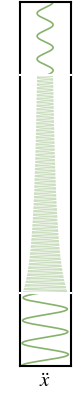

In [4]:
_dt = t[1] - t[0]
dd_x = np.gradient(WND_response[:,1],_dt,edge_order=2)

fig,ax = plt.subplots(1,1,figsize = (5/2.54/9,4/2.54),dpi = 300)
ax.set_xlabel(r'$x$')
ax.spines["left"].set_color("white")
ax.spines["right"].set_color("white")
ax.spines["top"].set_color("white")
ax.spines["bottom"].set_color("white")
ax.set_xticks([])
ax.set_yticks([])

ax.set_axis_off()
axins = inset_axes(ax, width="100%", height="20%", loc='lower left',
                   bbox_to_anchor=(0, 0, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(dd_x,t,lw = 0.4,color = colors[1],label = "$x'' = -x$")
axins.set_ylim(0,20)
axins.set_xlabel(r"$\ddot{x}$", fontsize = 5)
axins.set_xticks([])
axins.set_yticks([])
axins.set_xlim(-1.1,1.1)
# axins.spines["right"].set_color("white")
# axins.spines["top"].set_color("white")
# axins.spines["bottom"].set_color("white")
# axins.spines["left"].set_color("white")
axins.spines["right"].set_linewidth(bwith)
axins.spines["top"].set_color("white")
# axins.spines["bottom"].set_color("white")
# axins.spines["left"].set_color("white")

axins = inset_axes(ax, width="100%", height="20%", loc='lower left',
                   bbox_to_anchor=(0, 0.8, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(dd_x,t,lw = 0.4,color = colors[1],label = "$x'' = -x$")
axins.set_ylim(980,1000)
axins.set_xlim(-1.1,1.1)
axins.set_xticks([])
axins.set_yticks([])
# axins.spines["right"].set_color("white")
# axins.spines["top"].set_color("white")
axins.spines["bottom"].set_color("white")
# axins.spines["left"].set_color("white")
axins = inset_axes(ax, width="100%", height="60%", loc='lower left',
                   bbox_to_anchor=(0, 0.2, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(dd_x,t,lw = 0.05,color = colors[1],label = "$x'' = -x$")
axins.set_ylim(10,990)
axins.set_xlim(-1.1,1.1)
axins.set_yticks([])
# axins.set_xticks([500,1000,1500])
axins.set_xticks([])
# axins.spines["right"].set_color("white")
axins.spines["top"].set_color("white")
axins.spines["bottom"].set_color("white")
plt.savefig("./Fig/origin_ddx.svg",dpi = 400,transparent = True,bbox_inches="tight",pad_inches = 0.01)

4. Reconstruction on derivate $\ddot{x}$

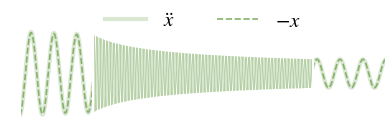

In [23]:
groundtruth_derivate = -omega0**2*WND_response[:,0]-2e-2*(WND_response[:,0]**3)-1e-2*(WND_response[:,1]**3)
predict_derivate = -omega0**2*WND_response[:,0]

fig,ax = plt.subplots(figsize = (4/2.54,1/2.54),dpi = 300)
# ax.spines["left"].set_color("white")
# ax.spines["right"].set_color("white")
# ax.spines["top"].set_color("white")
# ax.spines["bottom"].set_color("white")
ax.set_xticks([])
ax.set_yticks([])

ax.set_axis_off()
axins = inset_axes(ax, width="20%", height="100%", loc='center left',
                   bbox_to_anchor=(0, 0, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(t, groundtruth_derivate,lw = 1,color = colors[1],alpha = 0.3,label = "$\ddot{x}$")
axins.plot(t, predict_derivate,lw = 0.4,color = colors[1],ls = '--',label = "$-x$")
plt.legend(fontsize = 5,ncol = 2,bbox_to_anchor = (2.5,1.4),loc = 'upper center')
axins.set_xlim(0,20)
# axins.set_ylabel(r"$x$")
axins.set_xticks([])
axins.set_yticks([])
axins.set_ylim(-1.1,1.1)
axins.spines["right"].set_color("white")
axins.spines["top"].set_color("white")
axins.spines["bottom"].set_color("white")
axins.spines["left"].set_color("white")

axins = inset_axes(ax, width="20%", height="100%", loc='center left',
                   bbox_to_anchor=(0.8, 0, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(t, groundtruth_derivate,lw = 1,color = colors[1],alpha = 0.3)
axins.plot(t, predict_derivate,lw = 0.4,color = colors[1],ls = '--')
axins.set_xlim(980,1000)
axins.set_ylim(-1.1,1.1)
axins.set_xticks([])
axins.set_yticks([])
axins.spines["right"].set_color("white")
axins.spines["top"].set_color("white")
axins.spines["bottom"].set_color("white")
axins.spines["left"].set_color("white")
axins = inset_axes(ax, width="60%", height="100%", loc='center left',
                   bbox_to_anchor=(0.2, 0, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(t, groundtruth_derivate,lw = 0.05,color = colors[1])
axins.plot(t, predict_derivate,lw = 0.05,color = colors[1],ls = '--')
axins.set_xlim(20,980)
axins.set_ylim(-1.1,1.1)
axins.set_yticks([])
# axins.set_xticks([500,1000,1500])
axins.set_xticks([])
axins.spines["right"].set_color("white")
axins.spines["top"].set_color("white")
axins.spines["bottom"].set_color("white")
axins.spines["left"].set_color("white")
plt.savefig("./Fig/derivate_rebuild.svg",dpi = 400,transparent = True,bbox_inches="tight",pad_inches = 0.01)

5. Reconstruction on dynamic $x$

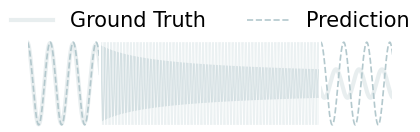

In [12]:
def PRE(x,t):
    dxdt = [x[1], -omega0**2*x[0]]
    return dxdt
x0 = [1,0]
PRE_response = odeint(PRE, y0 = x0,t = t)

fig,ax = plt.subplots(figsize = (4/2.54,1/2.54),dpi = 300)
# ax.spines["left"].set_color("white")
# ax.spines["right"].set_color("white")
# ax.spines["top"].set_color("white")
# ax.spines["bottom"].set_color("white")
ax.set_xticks([])
ax.set_yticks([])

ax.set_axis_off()
axins = inset_axes(ax, width="20%", height="100%", loc='center left',
                   bbox_to_anchor=(0, 0, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(t, WND_response[:,0],lw = 1,color = colors[0],alpha = 0.3,label = "Ground Truth")
axins.plot(t, PRE_response[:,0],lw = 0.4,color = colors[0],ls = '--',label = "Prediction")
plt.legend(fontsize = 5,ncol = 2,bbox_to_anchor = (2.5,1.5),loc = 'upper center')
axins.set_xlim(0,20)
# axins.set_ylabel(r"$x$")
axins.set_xticks([])
axins.set_yticks([])
axins.set_ylim(-1.1,1.1)
axins.spines["right"].set_color("white")
axins.spines["top"].set_color("white")
axins.spines["bottom"].set_color("white")
axins.spines["left"].set_color("white")

axins = inset_axes(ax, width="20%", height="100%", loc='center left',
                   bbox_to_anchor=(0.8, 0, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(t, WND_response[:,0],lw = 1,color = colors[0],alpha = 0.3)
axins.plot(t,PRE_response[:,0],lw = 0.4,color = colors[0],ls = '--')
axins.set_xlim(980,1000)
axins.set_ylim(-1.1,1.1)
axins.set_xticks([])
axins.set_yticks([])
axins.spines["right"].set_color("white")
axins.spines["top"].set_color("white")
axins.spines["bottom"].set_color("white")
axins.spines["left"].set_color("white")
axins = inset_axes(ax, width="60%", height="100%", loc='center left',
                   bbox_to_anchor=(0.2, 0, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(t, WND_response[:,0],lw = 0.05,color = colors[0])
axins.plot(t, PRE_response[:,0],lw = 0.05,color = colors[0],ls = '-', alpha = 0.6)


axins.set_xlim(20,980)
axins.set_ylim(-1.1,1.1)
axins.set_yticks([])
# axins.set_xticks([500,1000,1500])
axins.set_xticks([])
axins.spines["right"].set_color("white")
axins.spines["top"].set_color("white")
axins.spines["bottom"].set_color("white")
axins.spines["left"].set_color("white")
plt.savefig("./Fig/dynamic_rebuild.svg",dpi = 400,transparent = True,bbox_inches="tight",pad_inches = 0.01)

In [15]:
import sys
sys.path.append("../Model")
import Model

dim = 1
model = Model.WeakNO(dim,library,library_name)
model.Get_frequency(Observation.reshape(-1,1),t)
print("Identifed result: %.4f"%model.frequencys[0])
print("Ground Truth: %.4f" %omega0)

Identifed result: 1.0009
Ground Truth: 1.0000


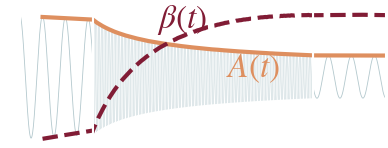

In [16]:
model.Get_Evolution(smooth_window = 1)

fig,ax = plt.subplots(figsize = (4/2.54,1.5/2.54),dpi = 300)
# ax.spines["left"].set_color("white")
# ax.spines["right"].set_color("white")
# ax.spines["top"].set_color("white")
# ax.spines["bottom"].set_color("white")
ax.set_xticks([])
ax.set_yticks([])

ax.set_axis_off()
axins = inset_axes(ax, width="20%", height="100%", loc='center left',
                   bbox_to_anchor=(0, 0, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(t, WND_response[:,0],lw = 0.2,color =colors[0],label = "\epsilon = 1e-3")
axins.plot(model.t_evolutions[:-1],model.evolutions[0,0,:-1], color = colors[3],lw = 1)
ax2 = axins.twinx()
ax2.plot(model.t_evolutions[:-1],np.radians(model.evolutions[1,0,:-1]), lw = 1,color = colors[2],ls = "--")
ax2.set_xlim(0,T)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.spines["right"].set_color("white")
ax2.spines["top"].set_color("white")
ax2.spines["bottom"].set_color("white")
ax2.spines["left"].set_color("white")
# plt.legend(fontsize = 5,ncol = 2,bbox_to_anchor = (5,1.3),loc = 'upper center')
axins.set_xlim(0,20)
# axins.set_ylabel(r"$x$")
axins.set_xticks([])
axins.set_yticks([])
axins.set_ylim(-1.1,1.1)
axins.spines["right"].set_color("white")
axins.spines["top"].set_color("white")
axins.spines["bottom"].set_color("white")
axins.spines["left"].set_color("white")

axins = inset_axes(ax, width="20%", height="100%", loc='center left',
                   bbox_to_anchor=(0.8, 0, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(t, WND_response[:,0],lw = 0.2,color =colors[0],label = "\epsilon = 1e-3")
axins.plot(model.t_evolutions[:-1],model.evolutions[0,0,:-1], color = colors[3],lw = 1)
ax2 = axins.twinx()
ax2.plot(model.t_evolutions[:-1],np.radians(model.evolutions[1,0,:-1]), lw = 1,color = colors[2],ls = "--")
ax2.set_xlim(0,T)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.spines["right"].set_color("white")
ax2.spines["top"].set_color("white")
ax2.spines["bottom"].set_color("white")
ax2.spines["left"].set_color("white")
axins.set_xlim(980,1000)
axins.set_ylim(-1.1,1.1)
axins.set_xticks([])
axins.set_yticks([])
axins.spines["right"].set_color("white")
axins.spines["top"].set_color("white")
axins.spines["bottom"].set_color("white")
axins.spines["left"].set_color("white")
axins = inset_axes(ax, width="60%", height="100%", loc='center left',
                   bbox_to_anchor=(0.2, 0, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(t, WND_response[:,0],lw = 0.05,color =colors[0],label = "\epsilon = 1e-3")
axins.plot(model.t_evolutions[:-1],model.evolutions[0,0,:-1], color = colors[3],lw = 1)
ax2 = axins.twinx()
ax2.plot(model.t_evolutions[:-1],np.radians(model.evolutions[1,0,:-1]), lw = 1,color = colors[2],ls = "--")
ax2.set_xlim(0,T)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.spines["right"].set_color("white")
ax2.spines["top"].set_color("white")
ax2.spines["bottom"].set_color("white")
ax2.spines["left"].set_color("white")


axins.set_xlim(20,980)
axins.set_ylim(-1.1,1.1)
axins.set_yticks([])
# axins.set_xticks([500,1000,1500])
axins.set_xticks([])
axins.spines["right"].set_color("white")
axins.spines["top"].set_color("white")
axins.spines["bottom"].set_color("white")
axins.spines["left"].set_color("white")
axins.text(600,0,"$A(t)$", color = colors[3],fontsize = 8)
axins.text(300,0.8,r"$\beta(t)$", color = colors[2],fontsize = 8)

plt.savefig("./Fig/evolution.svg",dpi = 400,transparent = True,bbox_inches="tight",pad_inches = 0.01)

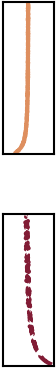

In [17]:
fig,ax = plt.subplots(2,1,figsize = (5/2.54/9,4/2.54),dpi = 300)
plt.subplots_adjust(hspace = 0.4,wspace = 0)
dt = model.t_evolutions[1] - model.t_evolutions[0]
ax[0].plot(np.gradient(model.evolutions[0,0,:],dt,edge_order=2)[2:-2],model.t_evolutions[2:-2],  lw = 1,alpha = 1,color = colors[3],ls = "-",label = r"True $dA/dt$")
ax[1].plot(np.gradient(model.evolutions[1,0,:],dt,edge_order=2)[2:-2], model.t_evolutions[2:-2], lw = 1,alpha = 1,color = colors[2],ls = "--",label = r"True $dA/dt$")
ax[0].set_xlim(-0.006,0.006)
ax[0].set_ylim(0,T)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xlim(-0.006,0.006)
ax[1].set_ylim(0,T)
ax[1].set_xticks([])
ax[1].set_yticks([])
plt.savefig("./Fig/evolution_dot.svg",dpi = 400,transparent = True,bbox_inches="tight",pad_inches = 0.01)

In [18]:
model.Library_rebuild()


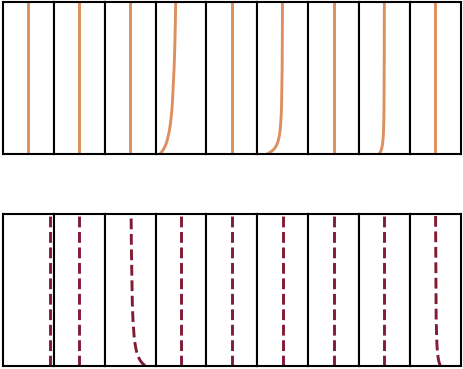

In [19]:
fig,axes = plt.subplots(2,9,figsize = (5/2.54,4/2.54),dpi = 300)
plt.subplots_adjust(hspace = 0.4,wspace = 0)
for i in range(9):
    ax = axes[0][i]
    # name = "\Phi_A(%s)  \Phi_\beta(%s)"%(library_name[i](feature_name),library_name[i](feature_name))
    ax.plot(model.Phi[:,0,i,0],model.t_evolutions, color = colors[3], ls = '-', lw = 0.7)
    # ax.plot(model.Phi[:,1,i,0],model.t_evolutions, color = colors[2], ls = '--', lw = 0.7)
    ax.set_xlim(-.6,.6)
    ax.set_ylim(0,T)
    ax.set_xticks([])
    ax.set_yticks([])

    ax = axes[1][i]
    # name = "\Phi_A(%s)  \Phi_\beta(%s)"%(library_name[i](feature_name),library_name[i](feature_name))
    # ax.plot(model.Phi[:,0,i,0],model.t_evolutions, color = colors[1], ls = '-', lw = 0.7)
    ax.plot(model.Phi[:,1,i,0],model.t_evolutions, color = colors[2], ls = '--', lw = 0.7)
    ax.set_xlim(-.6,.6)
    ax.set_ylim(0,T)
    ax.set_xticks([])
    ax.set_yticks([])
    # ax.set_xlabel(r"$%s$"%name, fontsize = 5)
plt.savefig("./Fig/evolution_library.svg",dpi = 400,transparent = True,bbox_inches="tight",pad_inches = 0.01)

In [20]:
model.optimize(sparse_threshold = 1e-1,
               stop_tolerance = 1e-3,
               step_tolerance=  1e-3,
               smooth_window=1)
print(model)

x0'' + 1.000054e+00x0 + 1.955619e-02x0^3 + 1.057399e-02x0'^3 = 0



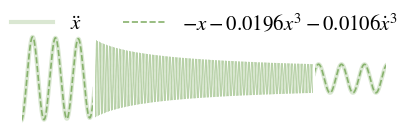

In [26]:
groundtruth_derivate = -omega0**2*WND_response[:,0]-2e-2*(WND_response[:,0]**3)-1e-2*(WND_response[:,1]**3)
predict_derivate = -omega0**2*WND_response[:,0]- 1.955619e-02*(WND_response[:,0]**3) - 1.057399e-02*(WND_response[:,1]**3)

fig,ax = plt.subplots(figsize = (4/2.54,1/2.54),dpi = 300)
# ax.spines["left"].set_color("white")
# ax.spines["right"].set_color("white")
# ax.spines["top"].set_color("white")
# ax.spines["bottom"].set_color("white")
ax.set_xticks([])
ax.set_yticks([])

ax.set_axis_off()
axins = inset_axes(ax, width="20%", height="100%", loc='center left',
                   bbox_to_anchor=(0, 0, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(t, groundtruth_derivate,lw = 1,color = colors[1],alpha = 0.3,label = "$\ddot{x}$")
axins.plot(t, predict_derivate,lw = 0.4,color = colors[1],ls = '--',label = "$-x-0.0196x^3-0.0106\dot{x}^3$")
plt.legend(fontsize = 5,ncol = 2,bbox_to_anchor = (2.5,1.45),loc = 'upper center')
axins.set_xlim(0,20)
# axins.set_ylabel(r"$x$")
axins.set_xticks([])
axins.set_yticks([])
axins.set_ylim(-1.1,1.1)
axins.spines["right"].set_color("white")
axins.spines["top"].set_color("white")
axins.spines["bottom"].set_color("white")
axins.spines["left"].set_color("white")

axins = inset_axes(ax, width="20%", height="100%", loc='center left',
                   bbox_to_anchor=(0.8, 0, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(t, groundtruth_derivate,lw = 1,color = colors[1],alpha = 0.3)
axins.plot(t, predict_derivate,lw = 0.4,color = colors[1],ls = '--')
axins.set_xlim(980,1000)
axins.set_ylim(-1.1,1.1)
axins.set_xticks([])
axins.set_yticks([])
axins.spines["right"].set_color("white")
axins.spines["top"].set_color("white")
axins.spines["bottom"].set_color("white")
axins.spines["left"].set_color("white")
axins = inset_axes(ax, width="60%", height="100%", loc='center left',
                   bbox_to_anchor=(0.2, 0, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(t, groundtruth_derivate,lw = 0.05,color = colors[1])
axins.plot(t, predict_derivate,lw = 0.05,color = colors[1],ls = '--')
axins.set_xlim(20,980)
axins.set_ylim(-1.1,1.1)
axins.set_yticks([])
# axins.set_xticks([500,1000,1500])
axins.set_xticks([])
axins.spines["right"].set_color("white")
axins.spines["top"].set_color("white")
axins.spines["bottom"].set_color("white")
axins.spines["left"].set_color("white")
plt.savefig("./Fig/derivate_rebuild_WNO.svg",dpi = 400,transparent = True,bbox_inches="tight",pad_inches = 0.01)

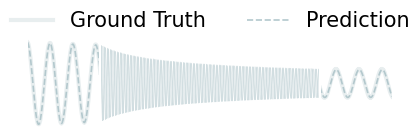

In [27]:
def WND_model(x,t):
    Phi = np.zeros(len(model.library))
    for i in range(len(model.library)):
        Phi[i] = model.library[i](x)
    dxdt = [x[1], -model.frequencys[0]**2*x[0]-np.sum(Phi*model.Xi[0])]
    # dxdt = [x[1], -2*x[0]-0.020*x[1]+0.02016069*x[0]*x[0]*x[1]]
    return dxdt

WND_predict = odeint(WND_model, y0 = x0,t = t)
fig,ax = plt.subplots(figsize = (4/2.54,1/2.54),dpi = 300)
ax.set_xticks([])
ax.set_yticks([])
# ax.spines["left"].set_color("white")
# ax.spines["right"].set_color("white")
# ax.spines["top"].set_color("white")
# ax.spines["bottom"].set_color("white")
ax.set_axis_off()
axins = inset_axes(ax, width="20%", height="100%", loc='center left',
                   bbox_to_anchor=(0, 0, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(t, Observation,lw = 1,color = colors[0],alpha = 0.3,label = "Ground Truth")
axins.plot(t, WND_predict[:,0],lw = 0.4,color = colors[0],ls = '--',label = "Prediction")
plt.legend(fontsize = 5,ncol = 2,bbox_to_anchor = (2.5,1.5),loc = 'upper center')
axins.set_xlim(0,20)
# axins.set_ylabel(r"$x(t)$")
axins.set_xticks([])
axins.set_yticks([])
axins.set_ylim(-1.1,1.1)
axins.spines["right"].set_color("white")
axins.spines["top"].set_color("white")
axins.spines["bottom"].set_color("white")
axins.spines["left"].set_color("white")

axins = inset_axes(ax, width="20%", height="100%", loc='center left',
                   bbox_to_anchor=(0.8, 0, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(t, Observation,lw = 1,color = colors[0],alpha = 0.3)
axins.plot(t, WND_predict[:,0],lw = 0.4,color = colors[0],ls = '--')
axins.set_xlim(980,1000)
axins.set_ylim(-1.1,1.1)
axins.set_xticks([])
axins.set_yticks([])
axins.spines["right"].set_color("white")
axins.spines["top"].set_color("white")
axins.spines["bottom"].set_color("white")
axins.spines["left"].set_color("white")
axins = inset_axes(ax, width="60%", height="100%", loc='center left',
                   bbox_to_anchor=(0.2, 0, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(t, Observation,lw = 0.05,color = colors[0],label = "True")
axins.plot(t, WND_predict[:,0],lw = 0.05,color = colors[0], ls = '--', label = "Fitting")
axins.set_xlim(20,980)
axins.set_ylim(-1.1,1.1)
axins.set_yticks([])
# axins.set_xticks([250,500,750])
axins.set_xticks([])
axins.spines["right"].set_color("white")
axins.spines["top"].set_color("white")
axins.spines["bottom"].set_color("white")
axins.spines["left"].set_color("white")
plt.savefig("./Fig/evolution_dynamic_rebuild.svg",dpi = 400,transparent = True,bbox_inches="tight",pad_inches = 0.01)
# axins.set_xlabel("Time")
# plt.legend(loc = "upper right",ncol = 1,fontsize = 5)
# plt.savefig("Fig/Example2-5.jpg",dpi = 300,transparent = True,bbox_inches="tight")

In [16]:
8364*8/417.81

160.14935018309757